<a href="https://colab.research.google.com/github/fereol023/My-ML-Courses-/blob/main/Regression_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Simuler des données qui correspondent à n=30 observations bruitées du polynôme de degré 5, d’équation f(x)=1−x+2x^2−0.8x^3+0.6x^4−x^5, pour des points xi=i/n,i=1,…,n et un bruit gaussien d’écart-type σ=0.05.

Ajuster un polynôme de degré p=31 sur les données.

Visualiser de la fonction ajustée.

In [7]:
n = 30
theta = np.array([1, -1, 2, -0.8, 0.6, -1]) 
p0 = len(theta)-1 # on ne considère pas l'intercept

#vraie fonction
f=np.poly1d(np.flip(theta))

#simulation des données
x = np.linspace(0, 1, n)
poly = PolynomialFeatures(degree=p0)
X_sim = poly.fit_transform(x.reshape(-1, 1))
print(X_sim[:5])

sigma = 0.05
noise = np.random.normal(0, sigma, size=n) 
y = np.dot(X_sim,theta)+noise

#ajuster un polynôme de degré 31
p=31
# matrice des données
poly = PolynomialFeatures(degree=p,include_bias=False)
X = poly.fit_transform(x.reshape(-1, 1))
print(X.shape)
#==> est la matrice des [x^1 x^2 x^3 x^4 ..]

#regression polynomiale
poly_reg_model = LinearRegression()
poly_reg_model.fit(X, y)
print(poly_reg_model.coef_)
print("============"*2)
print(poly_reg_model.intercept_)
### ==> on a des coeff très très grands !!

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.44827586e-02 1.18906064e-03 4.10020911e-05
  1.41386521e-06 4.87539728e-08]
 [1.00000000e+00 6.89655172e-02 4.75624257e-03 3.28016729e-04
  2.26218434e-05 1.56012713e-06]
 [1.00000000e+00 1.03448276e-01 1.07015458e-02 1.10705646e-03
  1.14523082e-04 1.18472154e-05]
 [1.00000000e+00 1.37931034e-01 1.90249703e-02 2.62413383e-03
  3.61949494e-04 4.99240681e-05]]
(30, 31)
[-4.00662854e+02  3.43015521e+04 -1.26225975e+06  2.66918499e+07
 -3.66602705e+08  3.49202537e+09 -2.39529240e+10  1.20714041e+11
 -4.49607925e+11  1.22542668e+12 -2.35907474e+12  2.90778822e+12
 -1.52728723e+12 -1.28756588e+12  2.25377535e+12  2.96919004e+11
 -2.24394670e+12 -7.75552290e+10  2.14264060e+12  3.97883377e+11
 -2.04364558e+12 -9.35447807e+11  1.80595579e+12  1.46220445e+12
 -1.45215070e+12 -1.90004483e+12  1.49133849e+12  1.94784175e+12
 -2.89154050e+12  1.37133037e+12 -2.35148951e+11]
1.07381867

**Regression poly :** estimation par MCO
L'estimateur est : (X'X)^-1XY
Cdt° : X'X est inversible  
Si les vecteurs colonnes de X sont linérairement indépendants X'X est inversible
Dans R^n on a au maximum n vecteurs linéairement indépendant...
n = 30 et p+1 = 32 <br>
Chaque colonne est dans R^30. Sachant qu'on a 32 paramètres à estimer la résolution par MCO n'est pas possible car la matrice X'X n'est pas inversible puisque det=0.

Autre cas ou det(X'X) = 0, multicolinéarité ou corrélation très forte ==> pas de solution. <br>
Si les variables concernées ne sont pas significatives, on a des coefficents non nuls, très grands, qui se compensent.

<u>**Ridge** = MCO avec une contrainte sur la taille des coefficients<u> (formulation type lagrangien)

 

In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0) # 10^-5 et 0.01
ridge.fit(X,y)
w = ridge.coef_
print(w)

#calcul de la norme L^2 des coeff
L2 = np.sum(w**2)
print("=========="*3)
print(L2)

[-1.24340415e+01  2.63930168e+02 -2.44183961e+03  1.17249433e+04
 -3.11051582e+04  4.25250104e+04 -1.57818211e+04 -2.45957917e+04
  1.01351659e+04  2.34567687e+04  5.90101536e+03 -1.57901490e+04
 -2.07134215e+04 -8.19707402e+03  9.69115185e+03  2.04342188e+04
  1.84776513e+04  6.19142399e+03 -9.25843295e+03 -2.01716186e+04
 -2.16627654e+04 -1.32217353e+04  1.51379290e+03  1.63001204e+04
  2.45245865e+04  2.15734519e+04  6.91308147e+03 -1.43665528e+04
 -3.06506285e+04 -2.35350815e+04  3.18779326e+04]
11333305531.918108


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


Plus alpha augmente, plus la normale 2 diminue.<br>

On se donne une séquence de paramètres de complexité et on ajuste une régression ridge sur chaque paramètre de la séquence.

In [42]:
alphas = np.logspace(-6, -4, 200) # 200 nombres de 10^-6 à 10^6

clf = Ridge()
coefs = []
errors = []

for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_) # récup les coeff de la ridge avec le alpha considéré
    errors.append(mean_squared_error(clf.coef_, w)) # distance entre les coeff estimés et ceux de la régression classique


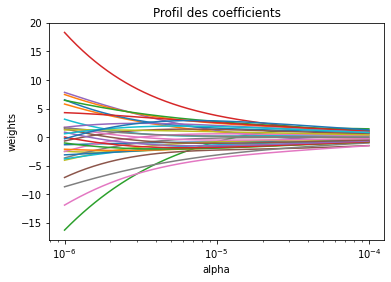

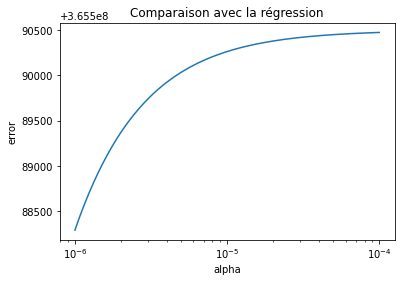

In [43]:
plt.figure()

#plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Profil des coefficients")
plt.axis("tight")
plt.show()
#plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("error")
plt.title("Comparaison avec la régression")
plt.axis("tight")

plt.show()

Quand alpha augmente, la distance avec les coefficients de la regression MCO (erreur moyenne) augmente, càd les coeff deviennent petits. <br>

**VALIDATION CROISEE POUR DETERMINER LES VALEURS OPTIMALES DE ALPHA**

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

ridgecv = RidgeCV(alphas=alphas, normalize=True)
ridgecv.fit(X_train, y_train)
print("Alpha=", ridgecv.alpha_)
ridge_b = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge_b.fit(X_train, y_train)

Alpha= 0.0001


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(

Ridge(alpha=0.0001, normalize=True)

On affiche le coefficient optimal et le calcul de l’erreur de prédiction par validation croisée pour chaque valeur de alpha.


In [57]:
print("best model coefficients:")
print(pd.Series(ridge_b.coef_, index=pd.DataFrame(X).columns))
print("mse ridge = ",mean_squared_error(y_test, ridge_b.predict(X_test)))

best model coefficients:
0    -1.314106
1     1.139846
2     1.822409
3     0.739208
4    -0.682963
5    -1.563064
6    -1.743269
7    -1.402860
8    -0.794605
9    -0.130635
10    0.448986
11    0.871693
12    1.115785
13    1.192585
14    1.131568
15    0.969555
16    0.743657
17    0.487196
18    0.227755
19   -0.013373
20   -0.220897
21   -0.384800
22   -0.499438
23   -0.562616
24   -0.574740
25   -0.538088
26   -0.456203
27   -0.333409
28   -0.174444
29    0.015820
30    0.232576
dtype: float64
mse ridge =  0.017806854028774004


In [59]:
y_pred = ridge_b.predict(X_test)
print(y_pred)
print("==========")
print(y_test)
print("==========")
mean_squared_error(y_test,y_pred)


[1.01880515 0.82295814 1.03511591 0.94103612 0.84369104 0.88631584]
[0.85005529 0.89206794 0.84731845 0.89633665 0.85924087 1.07626508]


0.017806854028774004